In [1]:
import arff
import sklearn as sk
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import sem
from sklearn.svm import SVC
from sklearn import svm, datasets
from sklearn.datasets import fetch_olivetti_faces, make_blobs
from sklearn.model_selection import train_test_split, cross_val_score, KFold

%run 'utils/arffconverter.ipynb'
%run 'utils/svmplothelper.ipynb'

## SVM - Support Vector Machines - Maszyny wektorów nośnych

Maszyny wektorów nośnych - SVM (ang. _Support Vector Machines_) to zbiór metod uczenia z nadzorem, który wykorzystywany jest do klasyfikacji, regresji (_Support Vector Regression_) oraz do obserwacji odstającej [[1](https://pl.wikipedia.org/wiki/Obserwacja_odstająca)] (ang. _outlier detection_). [[2](http://scikit-learn.org/stable/modules/svm.html#support-vector-machines)]


W ninejszym skrypcie przedstawiona została rola maszyn SVM jako klasyfikatorów wyznaczających hiperpłaszczyznę, która rozdziela instancje należące do różnych klas z maksymalnym możliwym marginesem. 

------
#### Zasada działania [[3](https://www.packtpub.com/big-data-and-business-intelligence/machine-learning-algorithms)]

Rozważmy zbiór atrybutów X:

<img src="img/svm_x.png" alt="SVM X" style="height: 50px;"/>

oraz zbiór klas Y, do kórych możemy zakwalifikować pojedynczy zbiór X (w poniższym przypadku albo 1, albo -1):

<img src="img/svm_y.png" alt="SVM Y" style="height: 40px;"/>

Poniższa funkcja generuje losowe wartości atrybutów X oraz klas y:


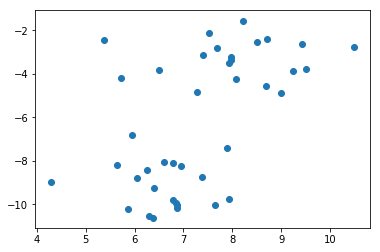

In [2]:
X, y = make_blobs(n_samples=40, centers=2, random_state=6)

plt.scatter(X[:, 0], X[:, 1])
plt.show()

Pionowa i pozioma oś wykresu prezentuje wartości atrybutów poszczególnych instacji. Mogą to być np. wartości pikseli albo temperatura powietrza oraz wilgotność w procentach. Powyższy wykres prezentuje graficzną reprezentację instancji posiadających dwa atrybuty, jednak w praktyce SVM stosuje się do rozwiązywania problemów wielowymiarowych. Przykładowo, klasyfikacja zawartości obrazu o rozmiarze 8x8 pikseli to wyznaczenie hiperpłaszczyzny płaszczyzny rozdzielającej 64-wymiarową przestrzeń atrybutów. 

W niniejszym skrypcie wykorzystano klasyfikator SVM biblioteki scikit. Trenowanie klasyfikatora odbywa się za pomocą funkcji `fit()`:

In [3]:
classifier = svm.SVC(kernel='linear', C=100)
classifier.fit(X, y)

SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

Scikit oferuje kilka rodzajów rdzenia klasyfikatora: `linear`, `rbf` and `poly`. 

Po zmianie rdzenia można zaobserwować inny kształt płaszczyzny rozdzielającej. Klasyfikator optymalizuje odległość pomiędzy przerywanymi liniami - margines. 

Na poniższym wykresie można zauważyć również zmianę kolorów punktów w zależności od klasy, do której zostały zakwalifikowane. 

1.0

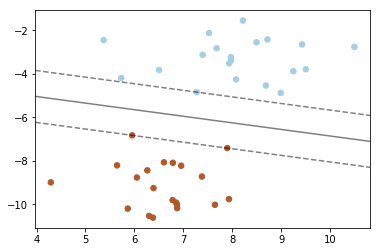

In [4]:
SVMPlotHelper().plot_decision_function(classifier, X, y)

cross_val_score(classifier, X, y, scoring='accuracy', cv=10).mean()

------
## Klasyfikacja i K-krotna walidacja krzyżowa plików ARFF

Za klasyfikację na podstawie dostarczych atrybutów odpowiada funkcja `predict()`. 

Poniższa tablica zawiera wykorzystywane w [poprzednim skrypcie](1_SieciBayesowskie.ipynb) pliki ARFF:

In [5]:
arff_paths= ['data/car.arff',     #0
            'data/credit.arff',   #1
            'data/patient.arff',  #2
            'data/weather.arff']  #3

W celu wybrania konkretnej ścieżki pliku, należy odpowiednio zmodyfikować zmienną `arff_file_index`:

In [6]:
arff_file_index = 0

data = load_arff(arff_paths[arff_file_index])
X = data.data
y = data.target

W kolejnym kroku należy ponownie stworzyć klasyfikator używając nowych danych.

Funkcja `cross_val_score` dokonuje walidacji krzyżowej [[4](sprawdzian z wypraw krzyżowych)]. Wyświetlany jest średni wynik klasyfikacji (`mean()`).

Wykres słupkowy prezentuje wynik walidacji krzyżowej dla różnych rodzajów rdzenia klasyfikatora SVM.

data/car.arff:
Mean [0.7741396693103911, 0.8923780077967469, 0.876653448044092]


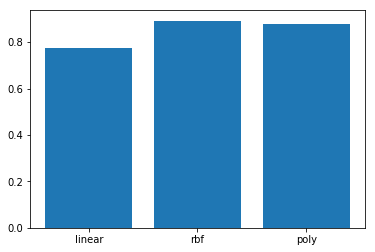

data/credit.arff:
Mean [0.7550000000000001, 0.75, 0.7210000000000001]


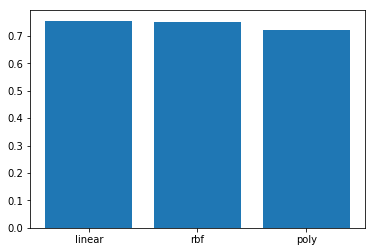

data/patient.arff:
Mean [0.6903508771929825, 0.6462719298245614, 0.6154970760233918]


/Users/jakubflis/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/jakubflis/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)
/Users/jakubflis/anaconda3/lib/python3.6/site-packages/sklearn/model_selection/_split.py:605: Warning: The least populated class in y has only 2 members, which is too few. The minimum number of members in any class cannot be less than n_splits=5.
  % (min_groups, self.n_splits)), Warning)


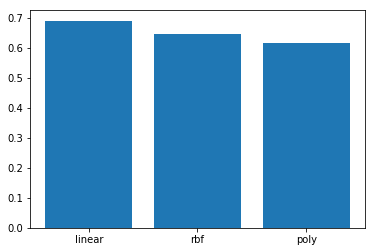

data/weather.arff:
Mean [0.36666666666666664, 0.6333333333333333, 0.7333333333333333]


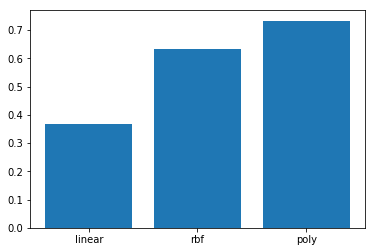

In [7]:
kernels = ['linear', 'rbf', 'poly']

for path in arff_paths:
    print(path + ":")
    
    data = load_arff(path)
    mean_values = []
    X = data.data
    y = data.target

    for kernel in kernels:
        classifier = svm.SVC(kernel=kernel, C=4)
        scores = cross_val_score(classifier, X, y, cv=5)
        mean_values.append(scores.mean())
        
    print("Mean", mean_values)
    plt.bar(kernels, mean_values)
    plt.show()
